# Two Body Problem

Define the problem and solve the ODE

In [1]:
%matplotlib inline

In [2]:
#Import scipy
import scipy as sci
from scipy.integrate import odeint, solve_ivp

#Import matplotlib and associated modules for 3D and animations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

#Import NumPy
import numpy as np

#Import Math
import math

In [3]:
class TwoBodyProblem():
    
    def __init__(self, m1 = 1, m2 = 2, G = 1):
        self.m1 = m1
        self.m2 = m2
        self.G = G
        
    def dy_dt(self, t, y):
        x_1, x_dot_1, x_2, x_dot_2, y_1, y_dot_1, y_2, y_dot_2 = y
        deltaX = x_1 - x_2
        deltaY = y_1 - y_2
        
        exprX1 = -1 * (self.G * self.m2 * deltaX) / (np.sqrt((deltaX ** 2) + (deltaY ** 2)) ** 3)
        exprY1 = -1 * (self.G * self.m2 * deltaY) / (np.sqrt((deltaX ** 2) + (deltaY ** 2)) ** 3)
        exprX2 = +1 * (self.G * self.m1 * deltaX) / (np.sqrt((deltaX ** 2) + (deltaY ** 2)) ** 3)
        exprY2 = +1 * (self.G * self.m1 * deltaY) / (np.sqrt((deltaX ** 2) + (deltaY ** 2)) ** 3)
       
        
        return [x_dot_1, exprX1, x_dot_2, exprX2, y_dot_1, exprY1, y_dot_2, exprY2]

    
    #Solves the ODE using solve_ivp function
    def solve_ode(self, t_pts, x_1_0, x_dot_1_0, x_2_0, x_dot_2_0, y_1_0, y_dot_1_0, y_2_0, y_dot_2_0, 
                  abserr=1.0e-9, relerr=1.0e-9):
        
        y = [x_1_0, x_dot_1_0, x_2_0, x_dot_2_0, y_1_0, y_dot_1_0, y_2_0, y_dot_2_0]
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), y, t_eval=t_pts, atol=abserr, rtol=relerr)
         
        x_1, x_dot_1, x_2, x_dot_2, y_1, y_dot_1, y_2, y_dot_2 = solution.y
                 
        return x_1, x_dot_1, x_2, x_dot_2, y_1, y_dot_1, y_2, y_dot_2

In [4]:
# Create a new two body class
body1_mass = 1
body2_mass = 5
two_body = TwoBodyProblem(m1=body1_mass, m2=body2_mass)

# Initial Conditions
x_1_0 = 1.
x_2_0 = -(body1_mass / body2_mass) * x_1_0
y_1_0 = 1.
y_2_0 = -(body1_mass / body2_mass) * y_1_0

# Initial Conditions for dots
x_dot_1_0 = -1.
y_dot_1_0 = 1.
x_dot_2_0 = -(body1_mass / body2_mass) * x_dot_1_0
y_dot_2_0 = -(body1_mass / body2_mass) * y_dot_1_0

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001
t_pts = np.arange(t_start, t_end+delta_t, delta_t)

# Get solved ODE
x_1, x_dot_1, x_2, x_dot_2, y_1, y_dot_1, y_2, y_dot_2 = two_body.solve_ode(t_pts, x_1_0, x_dot_1_0, x_2_0, x_dot_2_0, y_1_0, y_dot_1_0, y_2_0, y_dot_2_0)

### Sampling some ODE results for each coordinates

In [5]:
print('Results for each variable of output')
print('x_1', x_1)
print('y_1', y_1)
print('x_2', x_2)
print('y_2', y_2)

Results for each variable of output
x_1 [ 1.          0.99899939  0.99799755 ... -1.01651561 -1.01675932
 -1.01700004]
y_1 [1.         1.00099939 1.00199754 ... 0.28772021 0.28582169 0.28392232]
x_2 [-0.2        -0.19979988 -0.19959951 ...  0.20330312  0.20335186
  0.20340001]
y_2 [-0.2        -0.20019988 -0.20039951 ... -0.05754404 -0.05716434
 -0.05678446]


## Visualization Section

### Methods to Plot 2D charts of each body mass movement

In [6]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [7]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [8]:
def plot_graphs(x_1, y_1, x_2, y_2, t_pts, t_start, t_end, title):
    # start the plot!
    fig = plt.figure(figsize=(15,5))
    overall_title = title + '\n'     # \n means a new line (adds some space here)
    fig.suptitle(overall_title, va='baseline')
    
    # first plot: body mass - x1 per time
    ax_a = fig.add_subplot(1,2,1)                  

    start, stop = start_stop_indices(t_pts, t_start, t_end)
    plot_y_vs_x(x_1[start : stop], y_1[start : stop], 
                color='blue',
                title='Body Mass A', 
                label=None,
                axis_labels=('x(t)', 'y(t)'),
                ax=ax_a)

    # second plot: body mass a - y1 per time
    ax_b = fig.add_subplot(1,2,2)                  

    start, stop = start_stop_indices(t_pts, t_start, t_end)    
    plot_y_vs_x(x_2[start : stop], y_2[start : stop], 
                color='blue',
                label=None, 
                title=r'Body Mass B',
                axis_labels=('x(t)', 'y(t)'),
                ax=ax_b)

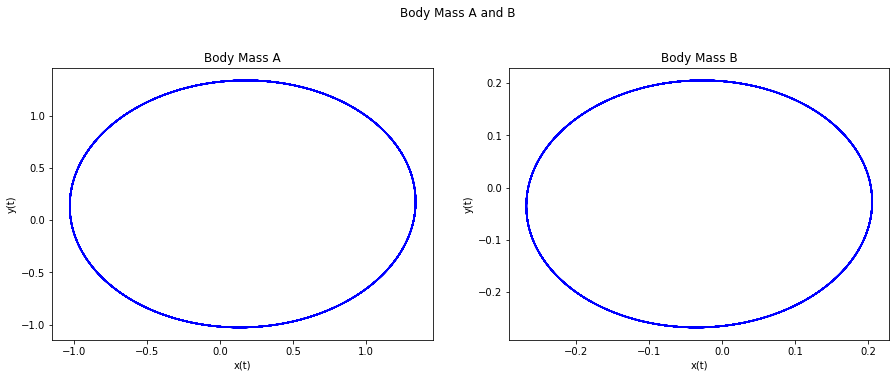

In [9]:
plot_graphs(x_1, y_1, x_2, y_2, t_pts, t_start, t_end, title='Body Mass A and B')

### Plot Both Body Mass at the same charts 2D and 3D

In [10]:
def plot_orbits(x_1, y_1, x_2, y_2, time):
    #Create figure
    fig=plt.figure(figsize=(15,20))
    
    #Create 2D axes
    ax=fig.add_subplot(2,1,1)

    #Plot the orbits
    ax.plot(x_1,y_1,color="darkblue")
    ax.plot(x_2,y_2,color="tab:red")

    #Plot the final positions of the stars
    ax.scatter(x_1[-1],y_1[-1],color="darkblue",marker="o",s=100,label="Body 1")
    ax.scatter(x_2[-1],y_2[-1],color="tab:red",marker="o",s=100,label="Body 2")
    
    #Add a few more bells and whistles
    ax.set_xlabel("x-coordinate",fontsize=14)
    ax.set_ylabel("y-coordinate",fontsize=14)
    ax.set_title("Visualization of orbits in a two-body system - 2D \n",fontsize=14)
    ax.legend(loc="upper left",fontsize=14)

    #Create 3D axes
    ax=fig.add_subplot(2,1,2,projection="3d")

    #Plot the orbits
    ax.plot(x_1,y_1,time,color="darkblue")
    ax.plot(x_2,y_2,time,color="tab:red")

    #Plot the final positions of the stars
    ax.scatter(x_1[-1],y_1[-1],time[-1],color="darkblue",marker="o",s=100,label="Body 1")
    ax.scatter(x_2[-1],y_2[-1],time[-1],color="tab:red",marker="o",s=100,label="Body 2")
    
    #Add a few more bells and whistles
    ax.set_xlabel("x(t)",fontsize=14)
    ax.set_ylabel("y(t)",fontsize=14)
    ax.set_zlabel("t",fontsize=14)
    ax.set_title("Visualization of orbits in a two-body system - Time Step\n",fontsize=14)
    ax.legend(loc="upper left",fontsize=14)

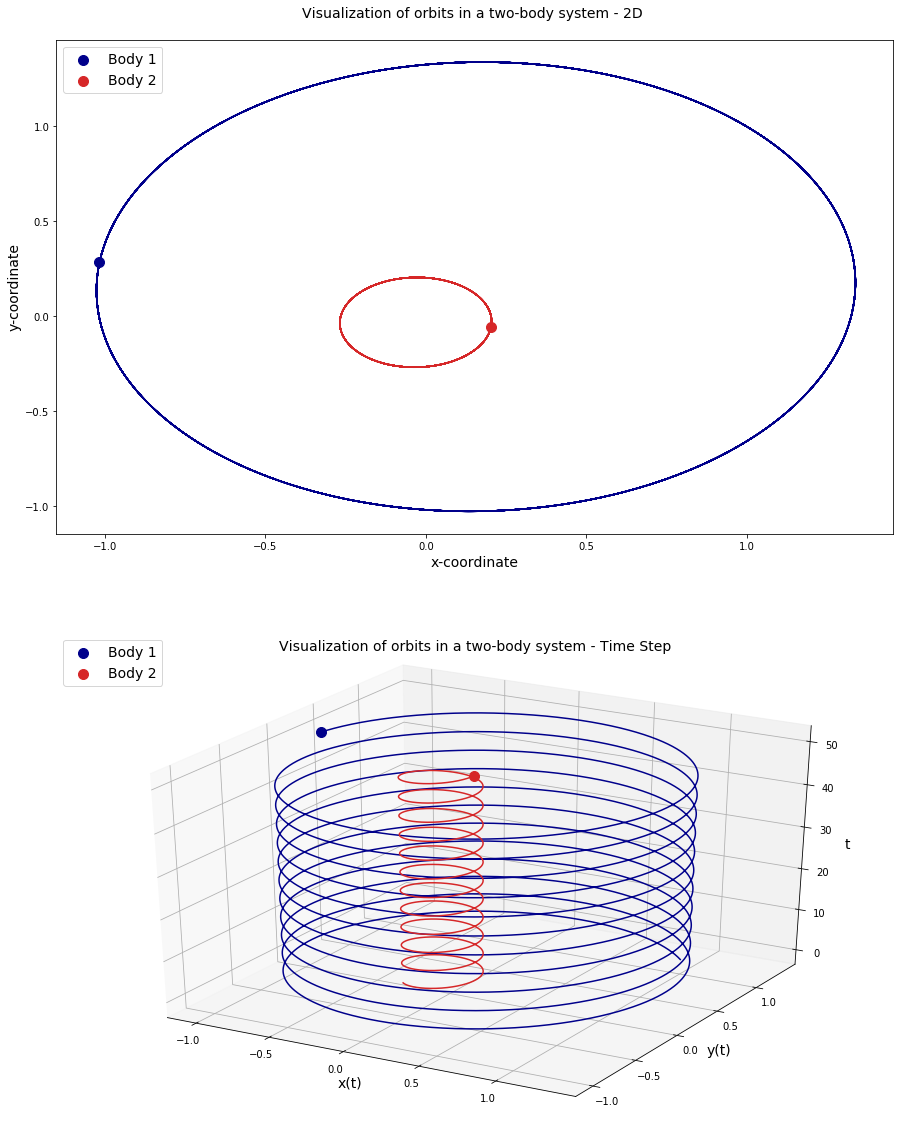

In [11]:
plot_orbits(x_1, y_1, x_2, y_2, t_pts)